In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train

,index,Nomor peserta,Nomor keluarga,Bobot,ID Kunjungan FKTP,Tanggal Datang,Tanggal Pulang,Provinsi Faskes,Kepemilikan Faskes,Jenis Faskes,...,Jenis Poli,Segmen Peserta,Diagnosis,Provinsi Faskes Rujukan,Kepemilikan Faskes Rujukan,Jenis Faskes Rujukan,Tipe Faskes Rujukan,Jenis Poli Rujukan,Jenis Kunjungan Faskes,Status Peserta
0,0,73913167.0,73913167,62.487934,137661220P000223,2020-12-12,2020-12-12,Jawa Timur,Swasta,Klinik Pratama,...,POLI UMUM,PBPU,Insulin-dependent diabetes mellitus with coma,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit,Belum_Sehat
1,1,187825971.0,187825969,11.345645,478791120P000005,2020-11-02,2020-11-02,DI Yogyakarta,Swasta,Klinik Pratama,...,POLI KIA,Bukan pekerja,Prolonged pregnancy,DI Yogyakarta,Swasta,Puskesmas,RS Swasta Setara Type D,MISSING,Kunjungan sakit,Belum_Sehat
2,2,53940892.0,53940892,122.385887,1135614839,2020-02-04,2020-02-04,DKI Jakarta,PemProv,Puskesmas,...,Konseling,PBI APBD,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat,Sehat
3,3,8671315.0,52616999,85.407494,232430219Y001189,2019-02-24,2019-02-24,Jambi,Swasta,Klinik Pratama,...,POLI UMUM,PPU,"Acute upper respiratory infection, unspecified",NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit,Belum_Sehat
4,4,19451459.0,79653335,62.295994,1299223191,2020-08-18,2020-08-18,Sumatera Selatan,PemKab,Puskesmas,...,Home-Visit,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat,Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,27593643.0,27593643,246.872818,1386139258,2020-11-16,2020-11-16,DI Yogyakarta,Swasta,Klinik Pratama,...,KUNJUNGAN ONLINE,PPU,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat,Sehat
599996,599996,10710870.0,40481437,76.793205,1212214395,2020-04-06,2020-04-06,Riau,PemKab,Puskesmas,...,Konseling,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat,Sehat
599997,599997,57881089.0,57881089,152.956100,811422104,2019-03-27,2019-03-27,Sumatera Selatan,PemKab,Puskesmas,...,Konseling,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat,Sehat
599998,599998,103851967.0,23829633,12.303092,161380319Y000408,2019-03-23,2019-03-23,Jawa Tengah,PemKab,Puskesmas,...,POLI UMUM,PBI APBN,Acute bronchitis,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit,Belum_Sehat


In [4]:
# def lama_inap(df):
#     df[['Tanggal Pulang','Tanggal Datang']] = df[['Tanggal Datang','Tanggal Pulang']].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f'))
#     df["lama_inap"] = (df['Tanggal Pulang'] - df['Tanggal Datang']) / np.timedelta64(1, "D")
#     df = df.drop(['Tanggal Datang', 'Tanggal Pulang'], axis = 1)
#     return df

# train = lama_inap(train)
# test = lama_inap(test)

In [5]:
train.isnull().sum()

index                              0
Nomor peserta                      0
Nomor keluarga                     0
Bobot                              0
ID Kunjungan FKTP                  0
Tanggal Datang                     0
Tanggal Pulang                     0
Provinsi Faskes                    0
Kepemilikan Faskes                 0
Jenis Faskes                       0
Tipe Faskes                        0
Tingkat Pelayanan Faskes           0
Jenis Poli                         0
Segmen Peserta                     0
Diagnosis                          0
Provinsi Faskes Rujukan       556677
Kepemilikan Faskes Rujukan         0
Jenis Faskes Rujukan               0
Tipe Faskes Rujukan           556693
Jenis Poli Rujukan                 0
Jenis Kunjungan Faskes             0
Status Peserta                     0
dtype: int64

Dilakukan pengecekan apakah terdapat missing values di dataset. Disini dapat dilihat bahwa terdapat missing value cukup banyak di Provinsi Faskes Rujukan dan Tipe Faskes Rujukan. Untuk kedua kolom tersebut, dilakukan handling missing value dengan metode mode(), yaitu missing value diisi dengan nilai modus suatu kolom.

In [6]:
# Mengganti nilai hilang dengan modus pada dataset train
train['Provinsi Faskes Rujukan'].fillna(train['Provinsi Faskes Rujukan'].mode()[0], inplace=True)
train['Tipe Faskes Rujukan'].fillna(train['Tipe Faskes Rujukan'].mode()[0], inplace=True)

# Mengganti nilai hilang dengan modus pada dataset test
test['Provinsi Faskes Rujukan'].fillna(test['Provinsi Faskes Rujukan'].mode()[0], inplace=True)
test['Tipe Faskes Rujukan'].fillna(test['Tipe Faskes Rujukan'].mode()[0], inplace=True)

In [7]:
train.isnull().sum()

index                         0
Nomor peserta                 0
Nomor keluarga                0
Bobot                         0
ID Kunjungan FKTP             0
Tanggal Datang                0
Tanggal Pulang                0
Provinsi Faskes               0
Kepemilikan Faskes            0
Jenis Faskes                  0
Tipe Faskes                   0
Tingkat Pelayanan Faskes      0
Jenis Poli                    0
Segmen Peserta                0
Diagnosis                     0
Provinsi Faskes Rujukan       0
Kepemilikan Faskes Rujukan    0
Jenis Faskes Rujukan          0
Tipe Faskes Rujukan           0
Jenis Poli Rujukan            0
Jenis Kunjungan Faskes        0
Status Peserta                0
dtype: int64

<Axes: >

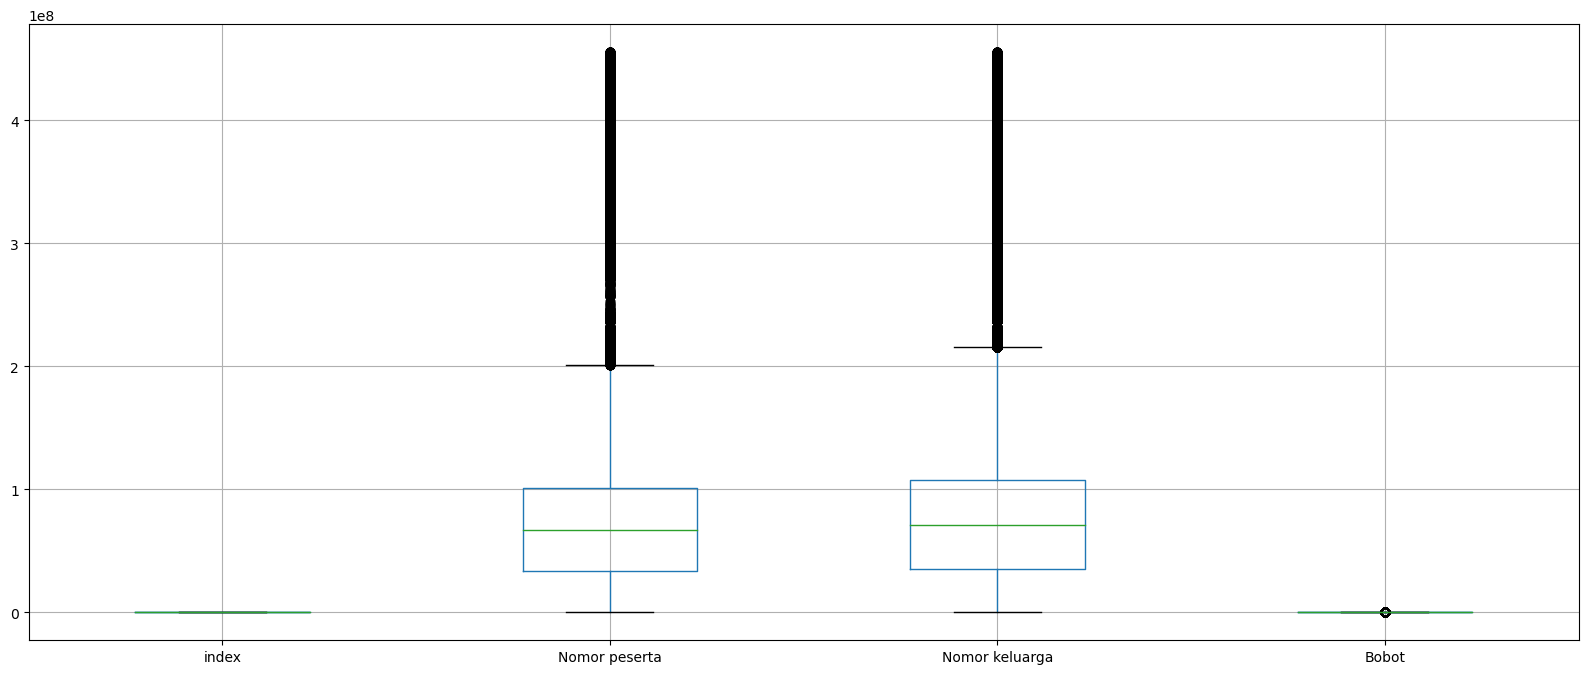

In [8]:
plt.figure(figsize=(20,8))
train.boxplot()

In [9]:
print(train['Bobot'].mean())

116.05071987899512


In [10]:
y = train
g = test

y['Tanggal Pulang'] = pd.to_datetime(y['Tanggal Pulang'])
y['Tanggal Datang'] = pd.to_datetime(y['Tanggal Datang'])

# Ekstraksi tahun, bulan, dan tanggal
y['Tahun Pulang'] = y['Tanggal Pulang'].dt.year
y['Bulan Pulang'] = y['Tanggal Pulang'].dt.month
y['Tanggal Pulang'] = y['Tanggal Pulang'].dt.day

y['Tahun Datang'] = y['Tanggal Datang'].dt.year
y['Bulan Datang'] = y['Tanggal Datang'].dt.month
y['Tanggal Datang'] = y['Tanggal Datang'].dt.day

g['Tanggal Pulang'] = pd.to_datetime(g['Tanggal Pulang'])
g['Tanggal Datang'] = pd.to_datetime(g['Tanggal Datang'])

# Ekstraksi tahun, bulan, dan tanggal
g['Tahun Pulang'] = g['Tanggal Pulang'].dt.year
g['Bulan Pulang'] = g['Tanggal Pulang'].dt.month
g['Tanggal Pulang'] = g['Tanggal Pulang'].dt.day

g['Tahun Datang'] = g['Tanggal Datang'].dt.year
g['Bulan Datang'] = g['Tanggal Datang'].dt.month
g['Tanggal Datang'] = g['Tanggal Datang'].dt.day

Untuk kolom Tanggal Datang dan Pulang perlu diubah karena tipe datanya bersifat object. Disini kedua kolom tersebut dipecah menjadi 6 kolom baru yaitu Tanggal, Bulan, dan Tahun datang dan pulang. Untuk melakukan hal tersebut pertama diubah bentuk object di kolom menjadi datetime dengan fungsi to_datetime dari pandas

In [11]:
from sklearn.preprocessing import LabelEncoder

def label_encode_object_columns(df):
    le = LabelEncoder()
    object_columns = df.select_dtypes(include=['object']).columns

    for column in object_columns:
        df[column] = le.fit_transform(df[column])

    return df

# Contoh penggunaan fungsi untuk label encoding pada semua kolom dengan tipe data object pada train
train = label_encode_object_columns(train)

# Contoh penggunaan fungsi untuk label encoding pada semua kolom dengan tipe data object pada test
test = label_encode_object_columns(test)

Menerapkan label encoding kepada sisa kolom yang bertipe data object agar meningkatkan akurasi model saat training 

In [12]:
train

,index,Nomor peserta,Nomor keluarga,Bobot,ID Kunjungan FKTP,Tanggal Datang,Tanggal Pulang,Provinsi Faskes,Kepemilikan Faskes,Jenis Faskes,...,Kepemilikan Faskes Rujukan,Jenis Faskes Rujukan,Tipe Faskes Rujukan,Jenis Poli Rujukan,Jenis Kunjungan Faskes,Status Peserta,Tahun Pulang,Bulan Pulang,Tahun Datang,Bulan Datang
0,0,73913167.0,73913167,62.487934,190952,12,12,10,4,3,...,8,2,17,1,0,0,2020,12,2020,12
1,1,187825971.0,187825969,11.345645,438118,2,2,4,4,3,...,4,1,18,0,0,0,2020,11,2020,11
2,2,53940892.0,53940892,122.385887,66988,4,4,5,3,5,...,8,2,17,1,1,1,2020,2,2020,2
3,3,8671315.0,52616999,85.407494,276598,24,24,7,4,3,...,8,2,17,1,0,0,2019,2,2019,2
4,4,19451459.0,79653335,62.295994,149650,18,18,32,2,5,...,8,2,17,1,1,1,2020,8,2020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,27593643.0,27593643,246.872818,196706,16,16,4,4,3,...,8,2,17,1,1,1,2020,11,2020,11
599996,599996,10710870.0,40481437,76.793205,103990,6,6,25,2,5,...,8,2,17,1,1,1,2020,4,2020,4
599997,599997,57881089.0,57881089,152.956100,502617,27,27,32,2,5,...,8,2,17,1,1,1,2019,3,2019,3
599998,599998,103851967.0,23829633,12.303092,225913,23,23,9,2,5,...,8,2,17,1,0,0,2019,3,2019,3


In [13]:
train.drop(columns=['ID Kunjungan FKTP', 'Nomor peserta', 'Nomor keluarga'], inplace=True)
test.drop(columns=['ID Kunjungan FKTP', 'Nomor peserta', 'Nomor keluarga'], inplace=True)

Drop kolom yang dirasa tidak terlalu mempengaruhi hasil dari training model dan tidak punya korelasi positif dengan kolom lainnya

In [16]:
# Normalisasi value setelah dilakukan labeling
def normalize(column):
    min_value = train[column].min()
    max_value = train[column].max()
    mv = test[column].min()
    mx = test[column].max()
    train[column] = (train[column] - min_value) / (max_value - min_value)    
    test[column] = (test[column] - mv) / (mx - mv)

c = [
    'Bobot', 'Provinsi Faskes', 'Kepemilikan Faskes', 'Jenis Faskes',
    'Tipe Faskes', 'Tingkat Pelayanan Faskes', 'Jenis Poli',
    'Segmen Peserta', 'Diagnosis', 'Provinsi Faskes Rujukan',
    'Kepemilikan Faskes Rujukan', 'Jenis Faskes Rujukan',
    'Tipe Faskes Rujukan', 'Jenis Poli Rujukan', 'Jenis Kunjungan Faskes'
]

# Normalisasi ke tiap kolom 
for column in c:
    normalize(column)

Dilakukan normalisasi dengan metode Min Max scaling kepada kolom yang sudah dilabel. Hal ini karena setelah dilakukan label encoding ditemukan bahwa persebaran data kolom terlalu timpang. Hal ini terlihat persebaran data rata-rata kolom yang sudah diencode jauh dari angka 1

In [17]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

X = train.drop(columns=['Status Peserta'])
y = train['Status Peserta']

# Membagi dataset menjadi train dan valid dengan ukuran 80 : 20
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=200000)

# Membuat model
rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=42)

Untuk model pertama digunakan metode Random Forest dengan tuning minimal dan parameter default. Hasil yang diperoleh ada di angka 0.99645.

In [18]:
y_pred_valid = rf_model.predict(X_valid)
y_pred_valid

array([0, 1, 1, ..., 0, 1, 0])

In [19]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Status Peserta'])
y = train['Status Peserta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200000)

# create model instance
bst = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.5, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

Untuk model kedua digunakan metode XGBoost dengan parameter default. Dipilih metode ini karena model dapat dijalankan lebih cepat dan memakan resource yang lebih sedikit. Hasil yang diperoleh naik di angka 0.99662. Pada aplikasi model RandomForest kolom Tanggal Datang dan Pulang, Provinsi, dan Provinsi Faskes ikut didrop dan belum dilakukan min max scaling. Pada model XGBoost ini, Provinsi dan Provinsi Faskes tidak didrop dan diterapkan label encoding.

In [20]:
# Split dataset into features and target
from catboost import CatBoostClassifier

X = train.drop('Status Peserta', axis=1)
y = train['Status Peserta']

# Create CatBoostClassifier model

model = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=6)

# Fit model

model.fit(X, y)

# Predict on test set

y_pred = model.predict(test)

0:	learn: 0.6436191	total: 259ms	remaining: 4m 18s
1:	learn: 0.5975720	total: 368ms	remaining: 3m 3s
2:	learn: 0.5568785	total: 476ms	remaining: 2m 38s
3:	learn: 0.5188457	total: 591ms	remaining: 2m 27s
4:	learn: 0.4799563	total: 700ms	remaining: 2m 19s
5:	learn: 0.4449730	total: 817ms	remaining: 2m 15s
6:	learn: 0.4114681	total: 921ms	remaining: 2m 10s
7:	learn: 0.3813999	total: 1.03s	remaining: 2m 8s
8:	learn: 0.3537804	total: 1.14s	remaining: 2m 5s
9:	learn: 0.3269286	total: 1.25s	remaining: 2m 3s
10:	learn: 0.3023027	total: 1.36s	remaining: 2m 2s
11:	learn: 0.2801557	total: 1.47s	remaining: 2m 1s
12:	learn: 0.2597175	total: 1.58s	remaining: 2m
13:	learn: 0.2405511	total: 1.68s	remaining: 1m 58s
14:	learn: 0.2228850	total: 1.78s	remaining: 1m 56s
15:	learn: 0.2062292	total: 1.88s	remaining: 1m 55s
16:	learn: 0.1906649	total: 1.97s	remaining: 1m 54s
17:	learn: 0.1762401	total: 2.07s	remaining: 1m 52s
18:	learn: 0.1634257	total: 2.16s	remaining: 1m 51s
19:	learn: 0.1511765	total: 2.25

159:	learn: 0.0041338	total: 15.1s	remaining: 1m 19s
160:	learn: 0.0041061	total: 15.2s	remaining: 1m 19s
161:	learn: 0.0040982	total: 15.3s	remaining: 1m 19s
162:	learn: 0.0040682	total: 15.4s	remaining: 1m 19s
163:	learn: 0.0040608	total: 15.5s	remaining: 1m 18s
164:	learn: 0.0040539	total: 15.6s	remaining: 1m 18s
165:	learn: 0.0040466	total: 15.6s	remaining: 1m 18s
166:	learn: 0.0040394	total: 15.7s	remaining: 1m 18s
167:	learn: 0.0040188	total: 15.8s	remaining: 1m 18s
168:	learn: 0.0040101	total: 15.9s	remaining: 1m 18s
169:	learn: 0.0039832	total: 16s	remaining: 1m 18s
170:	learn: 0.0039767	total: 16.1s	remaining: 1m 17s
171:	learn: 0.0039456	total: 16.2s	remaining: 1m 17s
172:	learn: 0.0039204	total: 16.3s	remaining: 1m 17s
173:	learn: 0.0039023	total: 16.3s	remaining: 1m 17s
174:	learn: 0.0038846	total: 16.4s	remaining: 1m 17s
175:	learn: 0.0038618	total: 16.5s	remaining: 1m 17s
176:	learn: 0.0038557	total: 16.6s	remaining: 1m 17s
177:	learn: 0.0038348	total: 16.7s	remaining: 1m

316:	learn: 0.0026432	total: 29.2s	remaining: 1m 2s
317:	learn: 0.0026401	total: 29.2s	remaining: 1m 2s
318:	learn: 0.0026346	total: 29.4s	remaining: 1m 2s
319:	learn: 0.0026298	total: 29.5s	remaining: 1m 2s
320:	learn: 0.0026238	total: 29.6s	remaining: 1m 2s
321:	learn: 0.0026217	total: 29.7s	remaining: 1m 2s
322:	learn: 0.0026202	total: 29.8s	remaining: 1m 2s
323:	learn: 0.0026185	total: 29.9s	remaining: 1m 2s
324:	learn: 0.0026168	total: 30s	remaining: 1m 2s
325:	learn: 0.0026149	total: 30.1s	remaining: 1m 2s
326:	learn: 0.0026132	total: 30.2s	remaining: 1m 2s
327:	learn: 0.0026116	total: 30.3s	remaining: 1m 2s
328:	learn: 0.0026038	total: 30.4s	remaining: 1m 1s
329:	learn: 0.0026010	total: 30.5s	remaining: 1m 1s
330:	learn: 0.0025984	total: 30.6s	remaining: 1m 1s
331:	learn: 0.0025968	total: 30.6s	remaining: 1m 1s
332:	learn: 0.0025949	total: 30.7s	remaining: 1m 1s
333:	learn: 0.0025932	total: 30.8s	remaining: 1m 1s
334:	learn: 0.0025906	total: 30.9s	remaining: 1m 1s
335:	learn: 0.

477:	learn: 0.0023722	total: 44.8s	remaining: 48.9s
478:	learn: 0.0023701	total: 44.9s	remaining: 48.8s
479:	learn: 0.0023701	total: 45s	remaining: 48.7s
480:	learn: 0.0023690	total: 45.1s	remaining: 48.6s
481:	learn: 0.0023674	total: 45.2s	remaining: 48.5s
482:	learn: 0.0023674	total: 45.3s	remaining: 48.5s
483:	learn: 0.0023674	total: 45.3s	remaining: 48.3s
484:	learn: 0.0023662	total: 45.5s	remaining: 48.3s
485:	learn: 0.0023662	total: 45.6s	remaining: 48.2s
486:	learn: 0.0023653	total: 45.6s	remaining: 48.1s
487:	learn: 0.0023653	total: 45.7s	remaining: 48s
488:	learn: 0.0023645	total: 45.8s	remaining: 47.9s
489:	learn: 0.0023631	total: 45.9s	remaining: 47.8s
490:	learn: 0.0023615	total: 46s	remaining: 47.7s
491:	learn: 0.0023615	total: 46.1s	remaining: 47.6s
492:	learn: 0.0023591	total: 46.2s	remaining: 47.5s
493:	learn: 0.0023545	total: 46.3s	remaining: 47.4s
494:	learn: 0.0023545	total: 46.4s	remaining: 47.4s
495:	learn: 0.0023535	total: 46.5s	remaining: 47.3s
496:	learn: 0.0023

636:	learn: 0.0022809	total: 59.1s	remaining: 33.7s
637:	learn: 0.0022809	total: 59.2s	remaining: 33.6s
638:	learn: 0.0022809	total: 59.3s	remaining: 33.5s
639:	learn: 0.0022809	total: 59.4s	remaining: 33.4s
640:	learn: 0.0022807	total: 59.5s	remaining: 33.3s
641:	learn: 0.0022807	total: 59.6s	remaining: 33.2s
642:	learn: 0.0022807	total: 59.7s	remaining: 33.1s
643:	learn: 0.0022794	total: 59.8s	remaining: 33s
644:	learn: 0.0022794	total: 59.8s	remaining: 32.9s
645:	learn: 0.0022794	total: 59.9s	remaining: 32.8s
646:	learn: 0.0022781	total: 1m	remaining: 32.8s
647:	learn: 0.0022768	total: 1m	remaining: 32.7s
648:	learn: 0.0022768	total: 1m	remaining: 32.6s
649:	learn: 0.0022768	total: 1m	remaining: 32.5s
650:	learn: 0.0022768	total: 1m	remaining: 32.4s
651:	learn: 0.0022768	total: 1m	remaining: 32.3s
652:	learn: 0.0022768	total: 1m	remaining: 32.2s
653:	learn: 0.0022768	total: 1m	remaining: 32.1s
654:	learn: 0.0022768	total: 1m	remaining: 32s
655:	learn: 0.0022768	total: 1m	remaining: 

797:	learn: 0.0022406	total: 1m 13s	remaining: 18.5s
798:	learn: 0.0022395	total: 1m 13s	remaining: 18.4s
799:	learn: 0.0022395	total: 1m 13s	remaining: 18.3s
800:	learn: 0.0022395	total: 1m 13s	remaining: 18.2s
801:	learn: 0.0022395	total: 1m 13s	remaining: 18.1s
802:	learn: 0.0022395	total: 1m 13s	remaining: 18.1s
803:	learn: 0.0022395	total: 1m 13s	remaining: 18s
804:	learn: 0.0022394	total: 1m 13s	remaining: 17.9s
805:	learn: 0.0022394	total: 1m 13s	remaining: 17.8s
806:	learn: 0.0022394	total: 1m 13s	remaining: 17.7s
807:	learn: 0.0022384	total: 1m 14s	remaining: 17.6s
808:	learn: 0.0022377	total: 1m 14s	remaining: 17.5s
809:	learn: 0.0022377	total: 1m 14s	remaining: 17.4s
810:	learn: 0.0022377	total: 1m 14s	remaining: 17.3s
811:	learn: 0.0022377	total: 1m 14s	remaining: 17.2s
812:	learn: 0.0022377	total: 1m 14s	remaining: 17.1s
813:	learn: 0.0022377	total: 1m 14s	remaining: 17s
814:	learn: 0.0022374	total: 1m 14s	remaining: 16.9s
815:	learn: 0.0022374	total: 1m 14s	remaining: 16.

953:	learn: 0.0022052	total: 1m 26s	remaining: 4.18s
954:	learn: 0.0022041	total: 1m 26s	remaining: 4.09s
955:	learn: 0.0022034	total: 1m 26s	remaining: 4s
956:	learn: 0.0022034	total: 1m 26s	remaining: 3.91s
957:	learn: 0.0022034	total: 1m 27s	remaining: 3.82s
958:	learn: 0.0022034	total: 1m 27s	remaining: 3.73s
959:	learn: 0.0022033	total: 1m 27s	remaining: 3.63s
960:	learn: 0.0022033	total: 1m 27s	remaining: 3.54s
961:	learn: 0.0022030	total: 1m 27s	remaining: 3.45s
962:	learn: 0.0022030	total: 1m 27s	remaining: 3.36s
963:	learn: 0.0022030	total: 1m 27s	remaining: 3.27s
964:	learn: 0.0022030	total: 1m 27s	remaining: 3.18s
965:	learn: 0.0022030	total: 1m 27s	remaining: 3.09s
966:	learn: 0.0022030	total: 1m 27s	remaining: 3s
967:	learn: 0.0022030	total: 1m 27s	remaining: 2.9s
968:	learn: 0.0022030	total: 1m 27s	remaining: 2.81s
969:	learn: 0.0022030	total: 1m 28s	remaining: 2.72s
970:	learn: 0.0022030	total: 1m 28s	remaining: 2.63s
971:	learn: 0.0022019	total: 1m 28s	remaining: 2.54s


Untuk model ketiga digunakan percobaan dengan metode CatBoost setelah menerapkan min max scaling dan Tanggal datang dan pulang disederhanakan lagi. Digunakan parameter default pada CatBoostClassifier. Hasilnya komputasi dijalankan dengan cepat dan perlu resource yang sangat minim. Tingkat akurasi meningkat jadi 0.99914

In [21]:
submission = pd.DataFrame({'index': test['index']})
submission['Status Peserta'] = y_pred_valid

In [22]:
submission

,index,Status Peserta
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
199995,199995,0
199996,199996,1
199997,199997,0
199998,199998,1


In [23]:
submission["Status Peserta"] = submission["Status Peserta"].map({0: 'Belum_Sehat', 1: 'Sehat'})

In [24]:
submission.to_csv('submission.csv', index=False)

In [25]:
# Menguji model pada data validasi
y_pred_valid = rf_model.predict(X_valid)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_valid, y_pred_valid)
print(f'Akurasi Model: {accuracy * 100:.2f}%')

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_valid, y_pred_valid))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))

NameError: name 'accuracy_score' is not defined